In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pandarallel import pandarallel

In [2]:
df = pd.read_parquet('datasets/taxi_trip/8_months_taxi.parquet')

In [3]:
df1 = df[['tpep_pickup_datetime']]
del df
df = df1.copy()
del df1

In [4]:
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)

In [5]:
df['WeekDay'] = df.tpep_pickup_datetime
df['YearWeek'] = df.tpep_pickup_datetime

In [6]:
def week_day(param):
    import datetime
    return param.strftime("%A")

def weekOfyear(param):
    import datetime
    return param.strftime("%W")

In [7]:

pandarallel.initialize(progress_bar=True)

# df.apply(func)
df.WeekDay = df.WeekDay.parallel_apply(week_day)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [8]:
df.YearWeek = df.YearWeek.parallel_apply(weekOfyear)

In [9]:
z = pd.DataFrame((df.groupby(['WeekDay','YearWeek']).size()))

In [10]:
statistics = pd.DataFrame(z.values, columns=['viajes_amount'])

In [11]:
# get index from statistics
day = list(range(0,z.values.shape[0]))
for idx, i in enumerate(z.index):
    day[idx] = i[0]

statistics['DayWeek'] = day

In [12]:
#statistics.groupby('DayWeek').median()

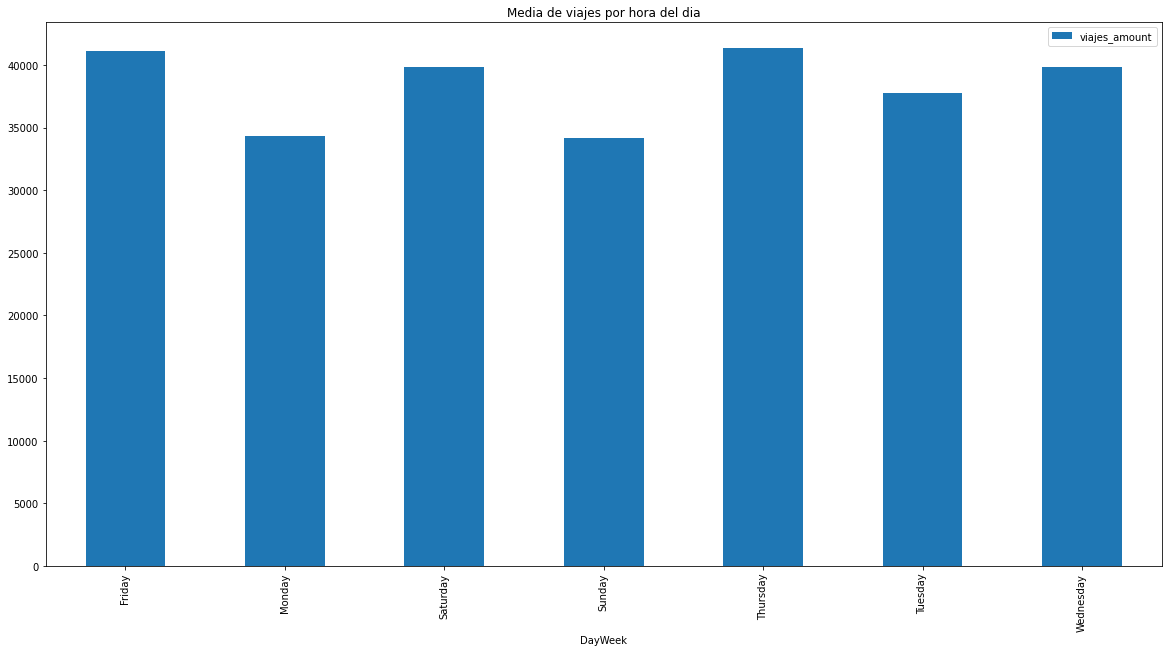

In [13]:
statistics.groupby('DayWeek').median().plot(
    kind = "bar",
    figsize = (20,10), 
    title = "Media de viajes por hora del dia") 
plt.show()

In [14]:
f = statistics.DayWeek.unique()

In [64]:
boxes = list(range(0,7))
h = f[[3, 1, 5, 6, 4, 0, 2]]

for i in boxes:
    boxes[i] = np.array(statistics.viajes_amount[statistics.DayWeek == h[i]])

In [89]:
import plotly.graph_objects as go
import numpy as np

#y0 = np.random.randn(50)
#y1 = np.random.randn(50) + 1 # shift mean
statistics.columns
fig = go.Figure()
for idx, i in enumerate(boxes):
    fig.add_trace(go.Box(y=i, name=h[idx],
                marker_color = 'blue'))
#fig.add_trace(go.Box(y=y1, name = 'Sample B',
#                marker_color = 'lightseagreen'))

fig.show()

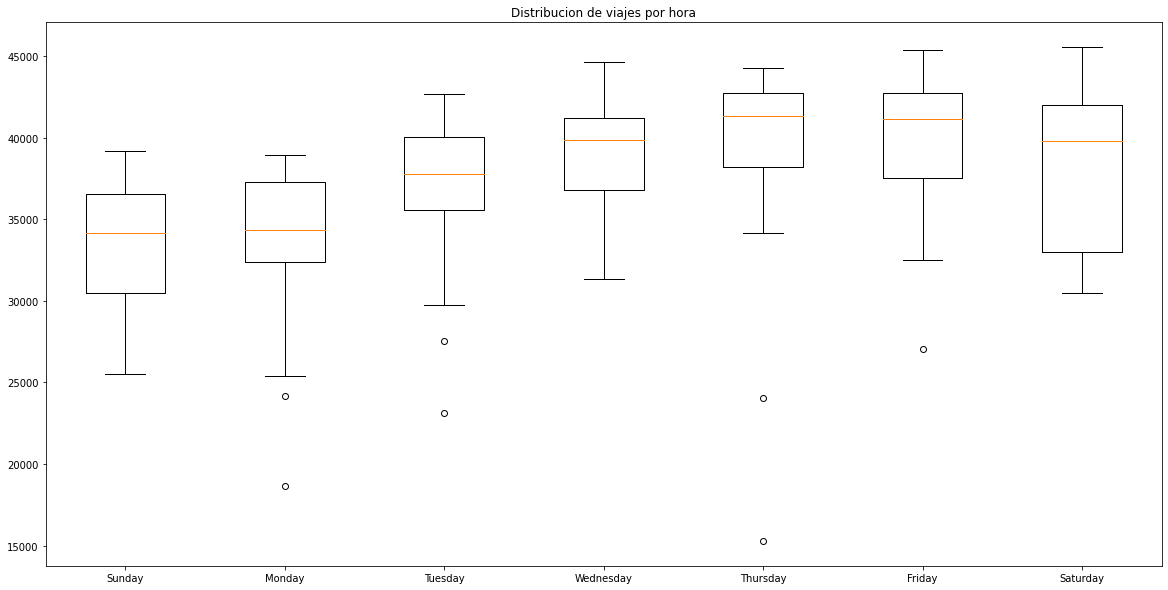

In [22]:
#plt.figure(figsize=(20,10))
#plt.boxplot(boxes)
#plt.title('Distribucion de viajes por hora')
#plt.xticks(list(range(1,8)), h)
#plt.show()